# TEMPERATURE TAHMİN MODELİ

In [227]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [229]:
dataset_5M = pd.read_csv("datasets\I_5M.csv",header =0)
dataset_5M.columns = ["Temperature","Humidity","Lux","IAQ","SharpIN","SharpOut","Sharp_Difference","PIR"]

In [230]:
dataset_5M.drop(dataset_5M.columns[[7,6,5,4]], axis=1, inplace=True)

In [231]:
values = dataset_5M.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [232]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

In [233]:
converted_time_series = series_to_supervised(scaled, 1, 1)

In [234]:
converted_time_series.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,0.882856,0.565048,0.488744,0.417287,0.887954,0.563643,0.471602,0.421152
2,0.887954,0.563643,0.471602,0.421152,0.900112,0.560115,0.434196,0.422117
3,0.900112,0.560115,0.434196,0.422117,0.899551,0.561814,0.380808,0.421473
4,0.899551,0.561814,0.380808,0.421473,0.897119,0.563251,0.334445,0.417303
5,0.897119,0.563251,0.334445,0.417303,0.892817,0.564558,0.297946,0.417287


In [235]:
converted_time_series.drop(converted_time_series.columns[[5,6,7]], axis=1, inplace=True)
#sıcaklık nem ve ışık t leri drop edildi
#(t-1) -> 
#var1(t) -> predict edilcek
converted_time_series.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t)
1,0.882856,0.565048,0.488744,0.417287,0.887954
2,0.887954,0.563643,0.471602,0.421152,0.900112
3,0.900112,0.560115,0.434196,0.422117,0.899551
4,0.899551,0.561814,0.380808,0.421473,0.897119
5,0.897119,0.563251,0.334445,0.417303,0.892817


In [236]:
converted_time_series_values = converted_time_series.values

In [237]:
#train_min = 8300 #split ~ %80 train --- %20  test  
train_min = 4000

In [238]:
train_set = converted_time_series_values[:train_min,:]
test_set = converted_time_series_values[train_min:, :]

In [239]:
train_X, train_y = train_set[:, :-1], train_set[:, -1]
test_X, test_y = test_set[:, :-1], test_set[:, -1]

In [240]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4000, 1, 4) (4000,) (924, 1, 4) (924,)


Train on 4000 samples, validate on 924 samples
Epoch 1/75
 - 104s - loss: 0.4332 - val_loss: 0.3100
Epoch 2/75
 - 0s - loss: 0.1053 - val_loss: 0.0782
Epoch 3/75
 - 0s - loss: 0.0761 - val_loss: 0.0769
Epoch 4/75
 - 0s - loss: 0.0701 - val_loss: 0.0734
Epoch 5/75
 - 0s - loss: 0.0657 - val_loss: 0.0714
Epoch 6/75
 - 0s - loss: 0.0620 - val_loss: 0.0695
Epoch 7/75
 - 0s - loss: 0.0594 - val_loss: 0.0689
Epoch 8/75
 - 0s - loss: 0.0569 - val_loss: 0.0677
Epoch 9/75
 - 0s - loss: 0.0544 - val_loss: 0.0661
Epoch 10/75
 - 0s - loss: 0.0518 - val_loss: 0.0642
Epoch 11/75
 - 0s - loss: 0.0489 - val_loss: 0.0611
Epoch 12/75
 - 0s - loss: 0.0464 - val_loss: 0.0584
Epoch 13/75
 - 0s - loss: 0.0439 - val_loss: 0.0555
Epoch 14/75
 - 0s - loss: 0.0411 - val_loss: 0.0524
Epoch 15/75
 - 0s - loss: 0.0382 - val_loss: 0.0489
Epoch 16/75
 - 0s - loss: 0.0354 - val_loss: 0.0455
Epoch 17/75
 - 0s - loss: 0.0325 - val_loss: 0.0421
Epoch 18/75
 - 0s - loss: 0.0296 - val_loss: 0.0388
Epoch 19/75
 - 0s - loss

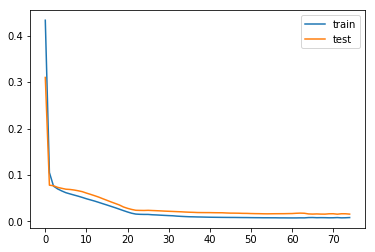

Train RMSE:   1
Test RMSE: 2.407


In [241]:
model = Sequential()
model.add(LSTM(50,activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))

  
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=75, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE



# make a prediction
yhat_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))
# invert scaling for forecast
inv_yhat_train = concatenate((yhat_train, train_X[:, 1:]), axis=1)
inv_yhat_train = scaler.inverse_transform(inv_yhat_train)
inv_yhat_train = inv_yhat_train[:,0]
# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_y_train = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:,0]
# calculate RMSE
rmse_train = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
rmse_test = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Train RMSE: %3.f' % rmse_train)
print('Test RMSE: %.3f' % rmse_test)


# DATA AUGMENTATION WITH GAUSSIAN NOISE 


In [242]:
def lstm_model_temperature_for_norm_dist(train_X_augmented,train_y_augmented,test_X,test_y):
    model_2 = Sequential()
    model_2.add(LSTM(50,activation='relu', input_shape=(train_X_augmented.shape[1], train_X_augmented.shape[2])))
    model_2.add(Dense(1))
    model_2.compile(loss='mae', optimizer='adam')
    # fit network
    history = model_2.fit(train_X_augmented, train_y_augmented, epochs=75, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()


    yhat = model_2.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]

    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]



    yhat_train_augmented = model_2.predict(train_X_augmented)
    train_X_augmented = train_X_augmented.reshape((train_X_augmented.shape[0], train_X_augmented.shape[2]))

    inv_yhat_train_augmented = concatenate((yhat_train_augmented, train_X_augmented[:, 1:]), axis=1)
    inv_yhat_train_augmented = scaler.inverse_transform(inv_yhat_train_augmented)
    inv_yhat_train_augmented = inv_yhat_train_augmented[:,0]

    train_y_augmented = train_y_augmented.reshape((len(train_y_augmented), 1))
    train_inv_y_augmented = concatenate((train_y_augmented, train_X_augmented[:, 1:]), axis=1)
    train_inv_y_augmented = scaler.inverse_transform(train_inv_y_augmented)
    train_inv_y_augmented = train_inv_y_augmented[:,0]




    rmse_test = sqrt(mean_squared_error(inv_y, inv_yhat))
    rmse_train = sqrt(mean_squared_error(train_inv_y_augmented, inv_yhat_train_augmented))

    print('Train RMSE: %.3f' % rmse_train)
    print('Test RMSE: %.3f' % rmse_test)
    return rmse_train


In [243]:
X = dataset_5M[['Humidity','Lux','IAQ']]
y = dataset_5M.iloc[:,0]

In [244]:
def noise(X, y, n, sigma):
    _X = X.copy()
    _y = y.copy()
    for _ in range(n):
        X = np.r_[X, _X + np.random.randn(*_X.shape)*sigma]
        y = np.r_[y, _y]
    return X, y

Train on 9848 samples, validate on 924 samples
Epoch 1/75
 - 24s - loss: 0.2693 - val_loss: 0.0685
Epoch 2/75
 - 1s - loss: 0.0626 - val_loss: 0.0647
Epoch 3/75
 - 1s - loss: 0.0553 - val_loss: 0.0600
Epoch 4/75
 - 1s - loss: 0.0491 - val_loss: 0.0543
Epoch 5/75
 - 1s - loss: 0.0431 - val_loss: 0.0473
Epoch 6/75
 - 1s - loss: 0.0372 - val_loss: 0.0402
Epoch 7/75
 - 1s - loss: 0.0305 - val_loss: 0.0319
Epoch 8/75
 - 1s - loss: 0.0227 - val_loss: 0.0297
Epoch 9/75
 - 1s - loss: 0.0166 - val_loss: 0.0207
Epoch 10/75
 - 1s - loss: 0.0133 - val_loss: 0.0171
Epoch 11/75
 - 1s - loss: 0.0117 - val_loss: 0.0167
Epoch 12/75
 - 1s - loss: 0.0114 - val_loss: 0.0187
Epoch 13/75
 - 1s - loss: 0.0111 - val_loss: 0.0203
Epoch 14/75
 - 1s - loss: 0.0105 - val_loss: 0.0190
Epoch 15/75
 - 1s - loss: 0.0104 - val_loss: 0.0180
Epoch 16/75
 - 1s - loss: 0.0101 - val_loss: 0.0184
Epoch 17/75
 - 1s - loss: 0.0100 - val_loss: 0.0181
Epoch 18/75
 - 1s - loss: 0.0098 - val_loss: 0.0159
Epoch 19/75
 - 1s - loss:

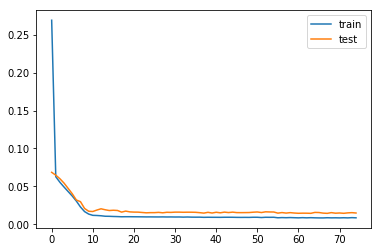

Train RMSE: 1.422
Test RMSE: 2.469
Train on 14772 samples, validate on 924 samples
Epoch 1/75
 - 15s - loss: 0.1736 - val_loss: 0.0579
Epoch 2/75
 - 1s - loss: 0.0470 - val_loss: 0.0510
Epoch 3/75
 - 1s - loss: 0.0390 - val_loss: 0.0412
Epoch 4/75
 - 1s - loss: 0.0311 - val_loss: 0.0329
Epoch 5/75
 - 1s - loss: 0.0227 - val_loss: 0.0322
Epoch 6/75
 - 1s - loss: 0.0156 - val_loss: 0.0192
Epoch 7/75
 - 1s - loss: 0.0118 - val_loss: 0.0157
Epoch 8/75
 - 1s - loss: 0.0099 - val_loss: 0.0151
Epoch 9/75
 - 1s - loss: 0.0092 - val_loss: 0.0152
Epoch 10/75
 - 1s - loss: 0.0091 - val_loss: 0.0151
Epoch 11/75
 - 1s - loss: 0.0090 - val_loss: 0.0152
Epoch 12/75
 - 1s - loss: 0.0089 - val_loss: 0.0152
Epoch 13/75
 - 1s - loss: 0.0089 - val_loss: 0.0148
Epoch 14/75
 - 1s - loss: 0.0088 - val_loss: 0.0151
Epoch 15/75
 - 1s - loss: 0.0088 - val_loss: 0.0151
Epoch 16/75
 - 1s - loss: 0.0087 - val_loss: 0.0154
Epoch 17/75
 - 1s - loss: 0.0087 - val_loss: 0.0152
Epoch 18/75
 - 1s - loss: 0.0087 - val_lo

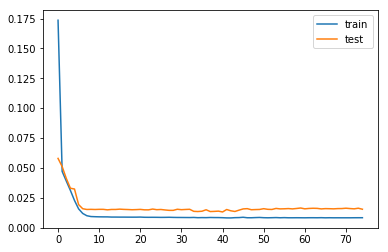

Train RMSE: 1.423
Test RMSE: 2.480
Train on 19696 samples, validate on 924 samples
Epoch 1/75
 - 14s - loss: 0.2035 - val_loss: 0.0686
Epoch 2/75
 - 1s - loss: 0.0530 - val_loss: 0.0570
Epoch 3/75
 - 1s - loss: 0.0396 - val_loss: 0.0400
Epoch 4/75
 - 1s - loss: 0.0245 - val_loss: 0.0285
Epoch 5/75
 - 1s - loss: 0.0141 - val_loss: 0.0178
Epoch 6/75
 - 1s - loss: 0.0110 - val_loss: 0.0161
Epoch 7/75
 - 1s - loss: 0.0097 - val_loss: 0.0163
Epoch 8/75
 - 1s - loss: 0.0091 - val_loss: 0.0162
Epoch 9/75
 - 1s - loss: 0.0090 - val_loss: 0.0155
Epoch 10/75
 - 1s - loss: 0.0089 - val_loss: 0.0157
Epoch 11/75
 - 1s - loss: 0.0087 - val_loss: 0.0150
Epoch 12/75
 - 1s - loss: 0.0085 - val_loss: 0.0146
Epoch 13/75
 - 1s - loss: 0.0083 - val_loss: 0.0148
Epoch 14/75
 - 1s - loss: 0.0083 - val_loss: 0.0151
Epoch 15/75
 - 1s - loss: 0.0083 - val_loss: 0.0142
Epoch 16/75
 - 1s - loss: 0.0083 - val_loss: 0.0142
Epoch 17/75
 - 1s - loss: 0.0082 - val_loss: 0.0148
Epoch 18/75
 - 1s - loss: 0.0082 - val_lo

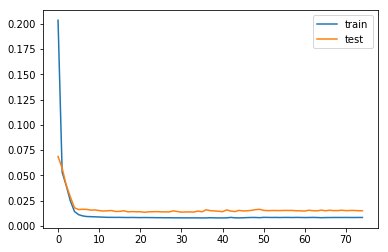

Train RMSE: 1.421
Test RMSE: 2.465
Train on 24620 samples, validate on 924 samples
Epoch 1/75
 - 15s - loss: 0.1163 - val_loss: 0.0583
Epoch 2/75
 - 2s - loss: 0.0397 - val_loss: 0.0378
Epoch 3/75
 - 2s - loss: 0.0225 - val_loss: 0.0245
Epoch 4/75
 - 2s - loss: 0.0120 - val_loss: 0.0180
Epoch 5/75
 - 2s - loss: 0.0093 - val_loss: 0.0160
Epoch 6/75
 - 2s - loss: 0.0087 - val_loss: 0.0161
Epoch 7/75
 - 2s - loss: 0.0086 - val_loss: 0.0175
Epoch 8/75
 - 2s - loss: 0.0086 - val_loss: 0.0155
Epoch 9/75
 - 2s - loss: 0.0085 - val_loss: 0.0169
Epoch 10/75
 - 2s - loss: 0.0085 - val_loss: 0.0154
Epoch 11/75
 - 2s - loss: 0.0085 - val_loss: 0.0179
Epoch 12/75
 - 2s - loss: 0.0085 - val_loss: 0.0182
Epoch 13/75
 - 2s - loss: 0.0085 - val_loss: 0.0175
Epoch 14/75
 - 2s - loss: 0.0084 - val_loss: 0.0145
Epoch 15/75
 - 2s - loss: 0.0083 - val_loss: 0.0182
Epoch 16/75
 - 2s - loss: 0.0084 - val_loss: 0.0143
Epoch 17/75
 - 2s - loss: 0.0081 - val_loss: 0.0135
Epoch 18/75
 - 2s - loss: 0.0081 - val_lo

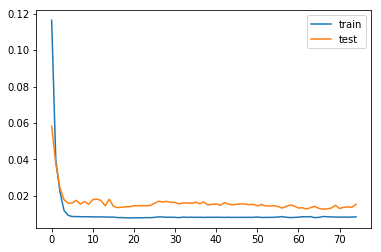

Train RMSE: 1.424
Test RMSE: 2.474
Train on 29544 samples, validate on 924 samples
Epoch 1/75
 - 15s - loss: 0.1410 - val_loss: 0.0627
Epoch 2/75
 - 2s - loss: 0.0421 - val_loss: 0.0387
Epoch 3/75
 - 2s - loss: 0.0221 - val_loss: 0.0224
Epoch 4/75
 - 2s - loss: 0.0125 - val_loss: 0.0162
Epoch 5/75
 - 2s - loss: 0.0101 - val_loss: 0.0158
Epoch 6/75
 - 2s - loss: 0.0093 - val_loss: 0.0159
Epoch 7/75
 - 2s - loss: 0.0090 - val_loss: 0.0172
Epoch 8/75
 - 2s - loss: 0.0091 - val_loss: 0.0160
Epoch 9/75
 - 2s - loss: 0.0088 - val_loss: 0.0167
Epoch 10/75
 - 2s - loss: 0.0088 - val_loss: 0.0166
Epoch 11/75
 - 2s - loss: 0.0089 - val_loss: 0.0160
Epoch 12/75
 - 2s - loss: 0.0087 - val_loss: 0.0154
Epoch 13/75
 - 2s - loss: 0.0087 - val_loss: 0.0158
Epoch 14/75
 - 2s - loss: 0.0085 - val_loss: 0.0150
Epoch 15/75
 - 2s - loss: 0.0084 - val_loss: 0.0140
Epoch 16/75
 - 2s - loss: 0.0084 - val_loss: 0.0136
Epoch 17/75
 - 2s - loss: 0.0083 - val_loss: 0.0140
Epoch 18/75
 - 2s - loss: 0.0082 - val_lo

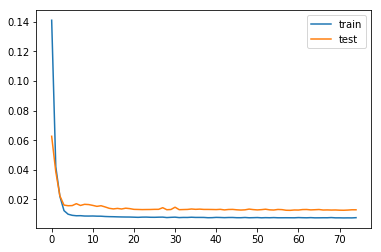

Train RMSE: 1.416
Test RMSE: 2.456


In [245]:
augmentation_size_rmse = []

augmentation_size = [1,2,3,4,5]

for i in range(0,len(augmentation_size)):
    _Xtr, _ytr = noise(X, y, augmentation_size[i], 4) #sigma 1
    augmented_X = pd.DataFrame(_Xtr)
    augmented_y = pd.DataFrame(_ytr)
    augmented_data = pd.concat([augmented_X,augmented_y],axis = 1)
    augmented_data.columns = ["Humidity","Lux","IAQ","Temperature"]
    augmented_data = pd.DataFrame(augmented_data,columns=["Temperature","Humidity","Lux","IAQ"])
    augmented_values = augmented_data.values
    scaled_augmented_values = scaler.fit_transform(augmented_values)

    converted_time_series_augmented = series_to_supervised(scaled_augmented_values, 1, 1)
    converted_time_series_augmented.drop(converted_time_series_augmented.columns[[5,6,7]], axis=1, inplace=True)
    converted_time_series_values_augmented = converted_time_series_augmented.values
   # train_min_augmented = [20756,31134,41512,51890,62268]
    train_min_augmented = [9848,14772,19696,24620,29544]
    train_set_augmented = converted_time_series_values_augmented[:train_min_augmented[i],:]
    train_X_augmented, train_y_augmented = train_set_augmented[:, :-1], train_set_augmented[:, -1]
    train_X_augmented = train_X_augmented.reshape((train_X_augmented.shape[0], 1, train_X_augmented.shape[1]))
    test_X_r = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    temp_test = lstm_model_temperature_for_norm_dist(train_X_augmented,train_y_augmented,test_X_r,test_y)
    augmentation_size_rmse.append(temp_test)
augmentation_size_rmse = pd.DataFrame(augmentation_size_rmse)
augmentation_size_rmse[1] = augmentation_size
augmentation_size_rmse.columns = ["Test RMSE","Augmentation Size"]

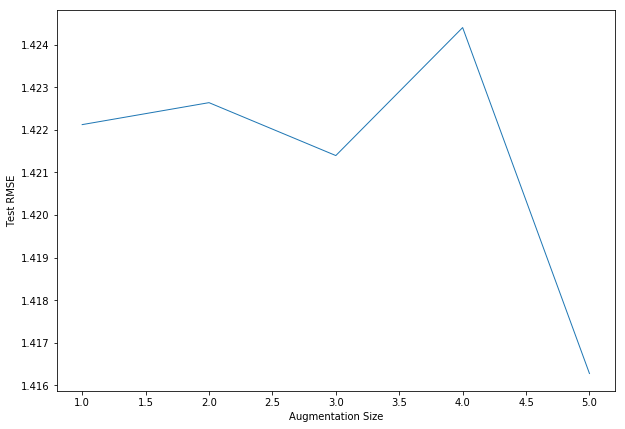

In [246]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x="Augmentation Size", y="Test RMSE",
                    estimator=None, lw=1,
                   data=augmentation_size_rmse)

In [247]:
augmentation_size_rmse.iloc[:,:1].values

array([[1.42212539],
       [1.42264162],
       [1.42139789],
       [1.42440662],
       [1.41627439]])

In [248]:
converted_time_series_values_augmented

array([[0.88285634, 0.56940869, 0.50220293, 0.44498778, 0.88795361],
       [0.88795361, 0.56846394, 0.48584194, 0.44848099, 0.90011223],
       [0.90011223, 0.56609106, 0.45014106, 0.44935323, 0.89955107],
       ...,
       [0.6369248 , 0.75509146, 0.57354686, 0.38496483, 0.64478114],
       [0.64478114, 0.66421851, 0.5710419 , 0.44689555, 0.65095398],
       [0.65095398, 0.62478336, 0.4775878 , 0.37997376, 0.65693977]])

#  DATA AUGMENTATION WITH SMOTE REGRESSION

In [249]:
smote_dataset_scaled = pd.DataFrame(scaled)


Smote_X_data = smote_dataset_scaled.drop(smote_dataset_scaled.columns[[0]], axis=1)

Smote_y_data = smote_dataset_scaled.drop(smote_dataset_scaled.columns[[1,2,3]],axis = 1)

In [250]:
Smote_X_data = np.array(Smote_X_data)
Smote_y_data = np.array(Smote_y_data)

In [251]:
import numpy as np
from random import randrange, choice
from sklearn.neighbors import NearestNeighbors

def SMOTE(T,N,k):

    n_minority_samples, n_features = T.shape

    if N < 100:

        N = 100
        pass

    if (N % 100) != 0:
        raise ValueError("N < 100 veya 100'ün katı olmalı")

    N = int(N/100)
    n_synthetic_samples = N * n_minority_samples
    n_synthetic_samples = int(n_synthetic_samples)
    S = np.zeros(shape=(n_synthetic_samples, n_features))
#nearest neighbours
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(T)

#Sentetik örneklerin hesaplanması
    for i in range(n_minority_samples):
        nn = neigh.kneighbors([T[i]], return_distance=False)
    
        for n in range(N):
            nn_index = choice(nn[0])
  
            while nn_index == i:
                nn_index = choice(nn[0])

            dif = T[nn_index] - T[i]
            gap = np.random.random()
            S[n + i * N, :] = T[i,:] + gap * dif[:]
    return S

In [252]:
def lstm_model_temperature_for_smote_reg(train_X_smote_augmented,train_y_smote_augmented,test_X,test_y):

    model_smote = Sequential()
    model_smote.add(LSTM(50,activation='relu', input_shape=(train_X_smote_augmented.shape[1], train_X_smote_augmented.shape[2])))

  
    model_smote.add(Dense(1))
    model_smote.compile(loss='mae', optimizer='adam')
    # fit network
    history = model_smote.fit(train_X_smote_augmented, train_y_smote_augmented, epochs=75, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    # make a prediction
    yhat = model_smote.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]



    yhat_train_augmented = model_smote.predict(train_X_smote_augmented)
    train_X_smote_augmented = train_X_smote_augmented.reshape((train_X_smote_augmented.shape[0], train_X_smote_augmented.shape[2]))

    inv_yhat_train_augmented = concatenate((yhat_train_augmented, train_X_smote_augmented[:, 1:]), axis=1)
    inv_yhat_train_augmented = scaler.inverse_transform(inv_yhat_train_augmented)
    inv_yhat_train_augmented = inv_yhat_train_augmented[:,0]

    train_y_smote_augmented = train_y_smote_augmented.reshape((len(train_y_smote_augmented), 1))
    train_inv_y_augmented = concatenate((train_y_smote_augmented, train_X_smote_augmented[:, 1:]), axis=1)
    train_inv_y_augmented = scaler.inverse_transform(train_inv_y_augmented)
    train_inv_y_augmented = train_inv_y_augmented[:,0]



    # calculate RMSE
    rmse_test = sqrt(mean_squared_error(inv_y, inv_yhat))
    rmse_train = sqrt(mean_squared_error(train_inv_y_augmented, inv_yhat_train_augmented))

    print('Train RMSE: %.3f' % rmse_train)
    print('Test RMSE: %.3f' % rmse_test)
    return rmse_train

0
Train on 9848 samples, validate on 924 samples
Epoch 1/75
 - 14s - loss: 0.2029 - val_loss: 0.0736
Epoch 2/75
 - 1s - loss: 0.0607 - val_loss: 0.0662
Epoch 3/75
 - 1s - loss: 0.0534 - val_loss: 0.0600
Epoch 4/75
 - 1s - loss: 0.0474 - val_loss: 0.0532
Epoch 5/75
 - 1s - loss: 0.0416 - val_loss: 0.0462
Epoch 6/75
 - 1s - loss: 0.0352 - val_loss: 0.0380
Epoch 7/75
 - 1s - loss: 0.0285 - val_loss: 0.0299
Epoch 8/75
 - 1s - loss: 0.0221 - val_loss: 0.0250
Epoch 9/75
 - 1s - loss: 0.0180 - val_loss: 0.0217
Epoch 10/75
 - 1s - loss: 0.0160 - val_loss: 0.0204
Epoch 11/75
 - 1s - loss: 0.0144 - val_loss: 0.0202
Epoch 12/75
 - 1s - loss: 0.0136 - val_loss: 0.0213
Epoch 13/75
 - 1s - loss: 0.0128 - val_loss: 0.0208
Epoch 14/75
 - 1s - loss: 0.0119 - val_loss: 0.0202
Epoch 15/75
 - 1s - loss: 0.0114 - val_loss: 0.0199
Epoch 16/75
 - 1s - loss: 0.0105 - val_loss: 0.0161
Epoch 17/75
 - 1s - loss: 0.0099 - val_loss: 0.0146
Epoch 18/75
 - 1s - loss: 0.0096 - val_loss: 0.0129
Epoch 19/75
 - 1s - los

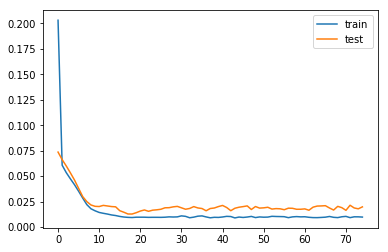

Train RMSE: 1.465
Test RMSE: 2.495
1
Train on 14772 samples, validate on 924 samples
Epoch 1/75
 - 16s - loss: 0.1902 - val_loss: 0.0759
Epoch 2/75
 - 1s - loss: 0.0668 - val_loss: 0.0709
Epoch 3/75
 - 1s - loss: 0.0606 - val_loss: 0.0645
Epoch 4/75
 - 1s - loss: 0.0553 - val_loss: 0.0582
Epoch 5/75
 - 1s - loss: 0.0496 - val_loss: 0.0501
Epoch 6/75
 - 1s - loss: 0.0428 - val_loss: 0.0425
Epoch 7/75
 - 1s - loss: 0.0333 - val_loss: 0.0430
Epoch 8/75
 - 1s - loss: 0.0231 - val_loss: 0.0302
Epoch 9/75
 - 1s - loss: 0.0151 - val_loss: 0.0168
Epoch 10/75
 - 1s - loss: 0.0102 - val_loss: 0.0130
Epoch 11/75
 - 1s - loss: 0.0085 - val_loss: 0.0137
Epoch 12/75
 - 1s - loss: 0.0086 - val_loss: 0.0136
Epoch 13/75
 - 1s - loss: 0.0083 - val_loss: 0.0137
Epoch 14/75
 - 1s - loss: 0.0080 - val_loss: 0.0136
Epoch 15/75
 - 1s - loss: 0.0080 - val_loss: 0.0141
Epoch 16/75
 - 1s - loss: 0.0081 - val_loss: 0.0144
Epoch 17/75
 - 1s - loss: 0.0078 - val_loss: 0.0145
Epoch 18/75
 - 1s - loss: 0.0077 - val_

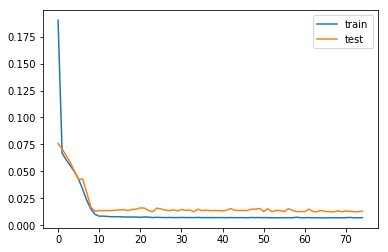

Train RMSE: 1.173
Test RMSE: 2.465
2
Train on 19696 samples, validate on 924 samples
Epoch 1/75
 - 15s - loss: 0.1656 - val_loss: 0.0641
Epoch 2/75
 - 2s - loss: 0.0498 - val_loss: 0.0672
Epoch 3/75
 - 2s - loss: 0.0393 - val_loss: 0.0578
Epoch 4/75
 - 2s - loss: 0.0293 - val_loss: 0.0414
Epoch 5/75
 - 2s - loss: 0.0205 - val_loss: 0.0212
Epoch 6/75
 - 2s - loss: 0.0125 - val_loss: 0.0202
Epoch 7/75
 - 2s - loss: 0.0094 - val_loss: 0.0182
Epoch 8/75
 - 2s - loss: 0.0085 - val_loss: 0.0151
Epoch 9/75
 - 2s - loss: 0.0076 - val_loss: 0.0148
Epoch 10/75
 - 2s - loss: 0.0075 - val_loss: 0.0145
Epoch 11/75
 - 2s - loss: 0.0076 - val_loss: 0.0169
Epoch 12/75
 - 2s - loss: 0.0077 - val_loss: 0.0182
Epoch 13/75
 - 2s - loss: 0.0076 - val_loss: 0.0157
Epoch 14/75
 - 2s - loss: 0.0073 - val_loss: 0.0147
Epoch 15/75
 - 2s - loss: 0.0075 - val_loss: 0.0168
Epoch 16/75
 - 2s - loss: 0.0073 - val_loss: 0.0149
Epoch 17/75
 - 2s - loss: 0.0074 - val_loss: 0.0149
Epoch 18/75
 - 2s - loss: 0.0074 - val_

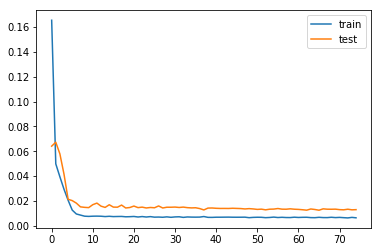

Train RMSE: 1.023
Test RMSE: 2.471
3
Train on 24620 samples, validate on 924 samples
Epoch 1/75
 - 17s - loss: 0.1347 - val_loss: 0.0839
Epoch 2/75
 - 2s - loss: 0.0476 - val_loss: 0.0705
Epoch 3/75
 - 2s - loss: 0.0395 - val_loss: 0.0604
Epoch 4/75
 - 2s - loss: 0.0303 - val_loss: 0.0437
Epoch 5/75
 - 2s - loss: 0.0203 - val_loss: 0.0317
Epoch 6/75
 - 2s - loss: 0.0102 - val_loss: 0.0143
Epoch 7/75
 - 2s - loss: 0.0078 - val_loss: 0.0148
Epoch 8/75
 - 2s - loss: 0.0074 - val_loss: 0.0141
Epoch 9/75
 - 2s - loss: 0.0076 - val_loss: 0.0138
Epoch 10/75
 - 2s - loss: 0.0075 - val_loss: 0.0140
Epoch 11/75
 - 2s - loss: 0.0075 - val_loss: 0.0136
Epoch 12/75
 - 2s - loss: 0.0072 - val_loss: 0.0138
Epoch 13/75
 - 2s - loss: 0.0074 - val_loss: 0.0133
Epoch 14/75
 - 2s - loss: 0.0071 - val_loss: 0.0138
Epoch 15/75
 - 2s - loss: 0.0071 - val_loss: 0.0139
Epoch 16/75
 - 2s - loss: 0.0071 - val_loss: 0.0134
Epoch 17/75
 - 2s - loss: 0.0071 - val_loss: 0.0135
Epoch 18/75
 - 2s - loss: 0.0071 - val_

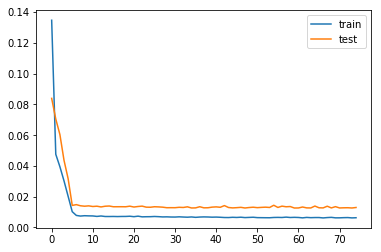

Train RMSE: 0.917
Test RMSE: 2.468
4
Train on 29544 samples, validate on 924 samples
Epoch 1/75
 - 17s - loss: 0.0979 - val_loss: 0.0830
Epoch 2/75
 - 3s - loss: 0.0405 - val_loss: 0.0539
Epoch 3/75
 - 3s - loss: 0.0275 - val_loss: 0.0314
Epoch 4/75
 - 3s - loss: 0.0131 - val_loss: 0.0219
Epoch 5/75
 - 3s - loss: 0.0100 - val_loss: 0.0164
Epoch 6/75
 - 3s - loss: 0.0094 - val_loss: 0.0151
Epoch 7/75
 - 3s - loss: 0.0082 - val_loss: 0.0144
Epoch 8/75
 - 3s - loss: 0.0087 - val_loss: 0.0146
Epoch 9/75
 - 3s - loss: 0.0087 - val_loss: 0.0143
Epoch 10/75
 - 3s - loss: 0.0078 - val_loss: 0.0151
Epoch 11/75
 - 3s - loss: 0.0070 - val_loss: 0.0159
Epoch 12/75
 - 3s - loss: 0.0089 - val_loss: 0.0165
Epoch 13/75
 - 2s - loss: 0.0085 - val_loss: 0.0171
Epoch 14/75
 - 2s - loss: 0.0085 - val_loss: 0.0168
Epoch 15/75
 - 2s - loss: 0.0084 - val_loss: 0.0150
Epoch 16/75
 - 2s - loss: 0.0082 - val_loss: 0.0152
Epoch 17/75
 - 2s - loss: 0.0080 - val_loss: 0.0161
Epoch 18/75
 - 2s - loss: 0.0087 - val_

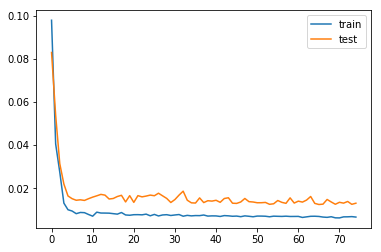

Train RMSE: 0.845
Test RMSE: 2.458


In [253]:
augmentation_size_smote_rmse = []
augmentation_size = [100,200,300,400,500]

for i in range(0,len(augmentation_size)):
    #from sklearn.neighbors import KNeighborsRegressor
    #augmented_x_smote, augmented_y_smote= smote(Smote_X_data,Smote_y_data,augmentation_size[i],5)
    from sklearn.neighbors import NearestNeighbors
    S = SMOTE(scaled,augmentation_size[i],3)
    smote_augmented_dataset = pd.DataFrame(S)
    normal_dataset = pd.DataFrame(scaled)
    smote_augmented_dataset = pd.concat([normal_dataset,smote_augmented_dataset],axis=0)
    #----------------
    #ugmented_x_smote = pd.DataFrame(augmented_x_smote)
    #ugmented_y_smote = pd.DataFrame(augmented_y_smote)

    #smote_augmented_dataset = augmented_x_smote
    #smote_augmented_dataset[3] = augmented_y_smote

    converted_time_series_smote_augmented = series_to_supervised(smote_augmented_dataset, 1, 1)
    converted_time_series_smote_augmented.drop(converted_time_series_smote_augmented.columns[[5,6,7]], axis=1, inplace=True)
    converted_time_series_values_smote_augmented = converted_time_series_smote_augmented.values


    train_min_smote_augmented = [9848,14772,19696,24620,29544]
    #train_min_smote_augmented = [20756,31134,41512,51890,62268]
    train_set_smote_augmented = converted_time_series_values_smote_augmented[:train_min_smote_augmented[i],:]
    print(i)
    train_X_smote_augmented, train_y_smote_augmented = train_set_smote_augmented[:, :-1], train_set_smote_augmented[:, -1]
    train_X_smote_augmented = train_X_smote_augmented.reshape((train_X_smote_augmented.shape[0], 1, train_X_smote_augmented.shape[1]))
    test_X_smote = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    temp_smote = lstm_model_temperature_for_smote_reg(train_X_smote_augmented,train_y_smote_augmented,test_X_smote,test_y)
    augmentation_size_smote_rmse.append(temp_smote)
augmentation_size_smote_rmse = pd.DataFrame(augmentation_size_smote_rmse)
augmentation_size_smote_rmse[1] = augmentation_size
augmentation_size_smote_rmse.columns = ["Test RMSE","Augmentation Size"]

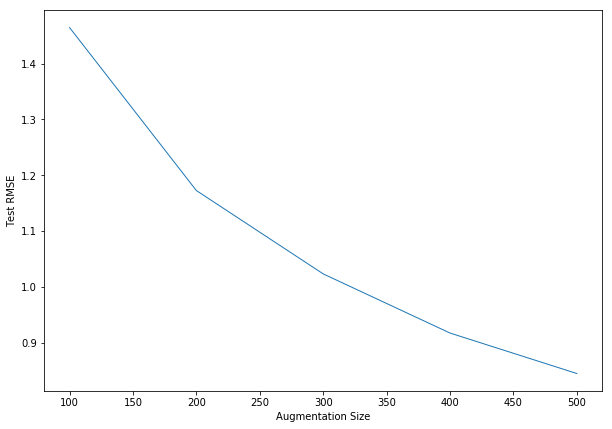

In [254]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x="Augmentation Size", y="Test RMSE",
                    estimator=None, lw=1,
                   data=augmentation_size_smote_rmse)

In [255]:
augmentation_size_smote_rmse.iloc[:,:1].values

array([[1.46464262],
       [1.17258557],
       [1.0232042 ],
       [0.91718891],
       [0.84468297]])